In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd

sys.path.append('..')
from data.utils import tables
from data import cro_dataset

# Initial Data descriptive table - All reports

In [2]:
df_master = pd.read_csv("/Users/david/Nextcloud/Dokumente/Education/Uni Bern/Master Thesis/Analyzing Financial Climate Disclosures with NLP/Data/stoxx_inference/Firm_AnnualReport.csv")
# TODO: Detail, but report here the original dataset or the one that could be labelled/inferred? There are 1-2 reports with issues... df_reports_count = df_master.groupby('year')['is_inferred'].sum()

no_of_reports = len(df_master)

df = df_master.groupby("firm_name").first()
df = df[['country','icb_industry']]

df['years'] = df_master.groupby('firm_name')['year'].apply(list).apply(lambda l: f"{min(l)} - {max(l)}")
df['country'] = df['country'].str.upper()
df['icb_industry'] = df['icb_industry'].str.slice(start=3)
df.rename(columns={"country": "Country", "icb_industry": "Industry", "years": "Years"}, inplace=True)

# Add a total column at the end
total_row = df.nunique()
total_row["Years"] = no_of_reports

df.loc[f"Unique firms: {len(df)}"] = total_row

tables.export_to_latex(df, filename="stoxx50_firms.tex", index_names=False, add_midrule_at=1, make_bold_row_at=[2, -3])

"\\begin{tabular}{llll}\n\\toprule\n\\bfseries {} & \\bfseries  Country & \\bfseries                 Industry & \\bfseries         Years \\\\\n\\midrule\nABB                           &      CH &             Industrials &  2008 - 2019 \\\\\nAIR LIQUIDE                   &      FR &         Basic Materials &  2007 - 2019 \\\\\nAIRBUS                        &      FR &             Industrials &  2000 - 2019 \\\\\nALLIANZ                       &      DE &              Financials &  2001 - 2019 \\\\\nANHEUSER-BUSCH INBEV          &      BE &        Consumer Staples &  2004 - 2019 \\\\\nASML HLDG                     &      NL &              Technology &  1999 - 2019 \\\\\nASTRAZENECA                   &      GB &             Health Care &  2004 - 2019 \\\\\nAXA                           &      FR &              Financials &  1999 - 2019 \\\\\nBARCLAYS                      &      GB &              Financials &  1999 - 2019 \\\\\nBASF                          &      DE &         Basic Materia

# Pages

In [3]:
import os
import yaml 

data_dir = "/Users/david/Projects/fin-disclosures-nlp/input_files/annual_reports"

def get_total_page_no(row):
    path = os.path.join(data_dir, f"{row.country}_{row.company}", f"{row.orig_report_type}_{row.year}", row.output_file)
    with open(path, 'r') as stream:
        content = yaml.safe_load(stream)
        return len(content['pages'])
    
df_master["total_page_no"] = df_master.apply(lambda x: get_total_page_no(x), axis=1)
    

In [4]:
df_master["total_page_no"].mean()

259.0479797979798

In [5]:
df_master

,id,company,orig_report_type,report_type,year,input_file,output_file,should_infer,is_inferred,company_id,firm_name,ticker,country,icb_industry,icb_supersector,labelling_dataset,total_page_no
0,dk_novo_nordisk_b-AR_2016,novo_nordisk_b,AR,AR,2016,dk_novo_nordisk_b/AR_2016.pdf,AR_2016.yml,True,True,dk_novo_nordisk_b,NOVO NORDISK B,NaN,dk,20 Health Care,2010 Health Care,NaN,121
1,dk_novo_nordisk_b-AR_2002,novo_nordisk_b,AR,AR,2002,dk_novo_nordisk_b/AR_2002.pdf,AR_2002.yml,True,True,dk_novo_nordisk_b,NOVO NORDISK B,NaN,dk,20 Health Care,2010 Health Care,NaN,64
2,dk_novo_nordisk_b-AR_2003,novo_nordisk_b,AR,AR,2003,dk_novo_nordisk_b/AR_2003.pdf,AR_2003.yml,True,True,dk_novo_nordisk_b,NOVO NORDISK B,NaN,dk,20 Health Care,2010 Health Care,NaN,64
3,dk_novo_nordisk_b-AR_2017,novo_nordisk_b,AR,AR,2017,dk_novo_nordisk_b/AR_2017.pdf,AR_2017.yml,True,True,dk_novo_nordisk_b,NOVO NORDISK B,NaN,dk,20 Health Care,2010 Health Care,NaN,121
4,dk_novo_nordisk_b-AR_2001,novo_nordisk_b,AR,AR,2001,dk_novo_nordisk_b/AR_2001.pdf,AR_2001.yml,True,True,dk_novo_nordisk_b,NOVO NORDISK B,NaN,dk,20 Health Care,2010 Health Care,NaN,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,ch_novartis-AR_2012,novartis,AR,AR,2012,ch_novartis/AR_2012.pdf,AR_2012.yml,True,True,ch_novartis,NOVARTIS,NaN,ch,20 Health Care,2010 Health Care,NaN,284
788,ch_novartis-AR_2008,novartis,AR,AR,2008,ch_novartis/AR_2008.pdf,AR_2008.yml,True,True,ch_novartis,NOVARTIS,NaN,ch,20 Health Care,2010 Health Care,training,260
789,ch_novartis-AR_2009,novartis,AR,AR,2009,ch_novartis/AR_2009.pdf,AR_2009.yml,True,True,ch_novartis,NOVARTIS,NaN,ch,20 Health Care,2010 Health Care,NaN,268
790,ch_novartis-AR_2019,novartis,AR,AR,2019,ch_novartis/AR_2019.pdf,AR_2019.yml,True,True,ch_novartis,NOVARTIS,NaN,ch,20 Health Care,2010 Health Care,NaN,343


# Keyword list

In [51]:
import pandas as pd
from data import dataframe_preparation
from data.utils import tables

pd.set_option('display.max_colwidth',1000)
vocabulary = dataframe_preparation.get_keywords_from_file("/Users/david/Projects/fin-disclosures-nlp/data/keyword_vocabulary.txt")
unigrams = [word for word in vocabulary if len(word.split(" ")) < 2]
bigrams = [word for word in vocabulary if len(word.split(" ")) > 1]

df_keyword_a = pd.DataFrame(data={"Unigrams": [", ".join(unigrams)]})
df_keyword_b = pd.DataFrame(data={"Bigrams": [", ".join(bigrams)]})
df_keyword = pd.concat([df_keyword_a, df_keyword_b], axis=1, sort=False)
tables.export_to_latex(df_keyword, filename="filter_vocabulary.tex")

'\\begin{tabular}{lll}\n\\toprule\n{} &                                                                                                                                                                                       Unigrams &                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [52]:
print(len(unigrams) + len(bigrams))

70


# Labels

In [10]:

data_dir = os.path.join("/Users/david/Nextcloud/Dokumente/Education/Uni Bern/Master Thesis/Analyzing Financial Climate Disclosures with NLP/Labelling/annual reports/")
df_train = pd.read_pickle(os.path.join(data_dir, 'Firm_AnnualReport_Labels_Training.pkl'))

In [18]:

df_train.query("cro != 'OP'").groupby("cro_sub_type_combined").count()

,report_id,cro,cro_sub_type,page,paragraph_no,label,comment,text,coder,indirect,vague,past,keyword,span_id,neg_type
cro_sub_type_combined,,,,,,,,,,,,,,,
ACUTE,113,113,113,113,113,110,88,113,113,113,113,113,12,7,0
CHRON,21,21,21,21,21,21,17,21,21,21,21,21,10,0,0
MARKET,51,51,51,51,51,46,33,51,51,51,51,51,19,0,0
POLICY,109,109,109,109,109,99,36,109,109,109,109,109,21,7,0
REPUTATION,29,29,29,29,29,27,18,29,29,29,29,29,8,3,0


In [5]:
t_d, t_l, tt_d, tt_l = cro_dataset.prepare_datasets(task="multi-label", cro_category_level="cro", should_filter_op=True, train_neg_sampling_strategy="all", test_neg_sampling_strategy="all")


Loaded dataset. Train: 27811, Test: 28209, Dim: 2


In [16]:
t_l.sum()

cro
PR    123
TR    164
dtype: int64

In [4]:
t_l.sum()

cro
PR    123
TR    164
dtype: int64

In [102]:
t_l.sum()

cro
PR    123
TR    164
OP    826
dtype: int64

## Status

We now have 933 samples with additional samples of about 15/100 reports that will be added as soon as possible, so more than 1000 samples are likely.
However, the categories both on main CRO level as well as the sub-categories are unbalanced.
In comparison to the other main categories, physical risks (PR) are often **indirect** (about 55%), i.e. there is no explicit mentioning of climate change but rather a consequence. Often, these examples are also labelled as *vague*, i.e. more of the boilerplate type.

<AxesSubplot:xlabel='cro,cro_sub_type_combined'>

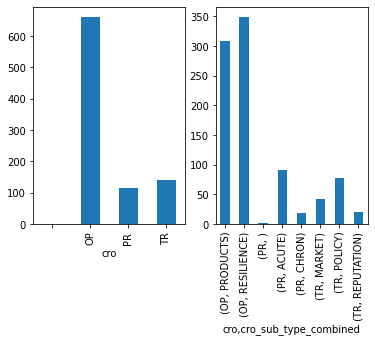

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2)
groups.plot(ax=axes[0], kind='bar')
sub_groups.plot(ax=axes[1], kind='bar')

## Experimental setup 

For the high-level experimental setup, there are multiple options:

- Step-by-Step: First classifiy if CRO relevant or not, then second step classify the main category. Then the sub-category...
- End-To-End: Directly try to infer category

--> I would propose for now that we attempt a Step-By-Step approach and actually start with the second task of classifying the main CRO categories to get an idea of how well the different methods perform. A benefit would this also have that getting the negative samples ise relatively straight-forward, i.e. just the opposite classes.

As document inputs, I would propose that we use paragraphs for now but having a sentence approach then as comparison. *Challenge: How would the labels be assigned for sentences?*

As evaluation metrics, F1-Scores (and Accuracy) are probably most useful.

### Preprocessing

Depending on the downstream classification approach, preprocessing such as stop-words removal, stemming/lemmatization is required. *Challenge: How can we make sure that the tense of a sentense is not removed in this step?*

### Approaches

A set of approaches is selected to compare performance and whether the "heavy-weights" are actually necessary. 

Embedding options:
    
    - BoW
    - TF-IDF
    - Word2Vec
    - Doc2Vec
    - Contextualized Word Embeddings (from BERT for example, i.e. only use the word embeddings from these models) without transfer learning, i.e. then select a classifier from below

Classifiers:
    
    - Logistic regression
    - SVM
    - Random Forest
    - XGBoost
    - Neural Net

And then the state of the art NLU models such as BERT/Roberta/...


In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('..')
import data
from data.labels_postprocessing import process

In [14]:
df = pd.read_pickle("/Users/david/Nextcloud/Dokumente/Education/Uni Bern/Master Thesis/Analyzing Financial Climate Disclosures with NLP/Labelling/annual reports/Firm_AnnualReport_Labels_100_combined.pkl")

In [19]:
df = process(df)

cro
        1
OP    661
PR    115
TR    141
dtype: int64


<AxesSubplot:ylabel='cro'>

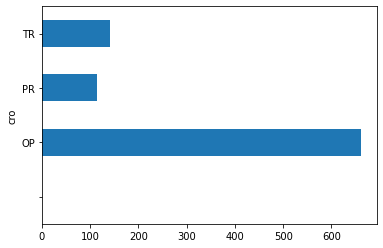

In [15]:
groups = df.groupby(['cro']).size()
print(groups)
groups.plot(kind='barh')

cro  cro_sub_type_combined
OP   PRODUCTS                 309
     RESILIENCE               349
PR                              1
     ACUTE                     91
     CHRON                     18
TR   MARKET                    42
     POLICY                    77
     REPUTATION                21
dtype: int64


<AxesSubplot:ylabel='cro,cro_sub_type_combined'>

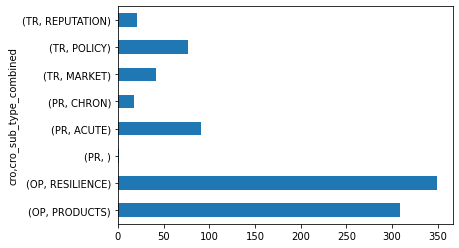

In [7]:
sub_groups = df.groupby(['cro','cro_sub_type_combined']).size()
print(sub_groups)
sub_groups.plot(kind='barh')

cro  indirect
     False         1
OP   False       629
     True         32
PR   False        51
     True         64
TR   False       128
     True         13
dtype: int64


<AxesSubplot:ylabel='cro,indirect'>

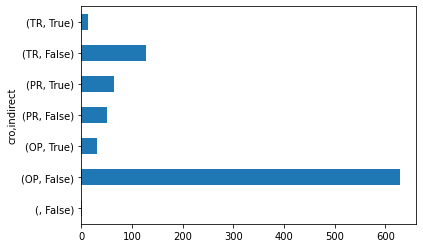

In [7]:
indirects = df.groupby(['cro','indirect']).size()
print(indirects)
indirects.plot(kind='barh')

cro  vague
     False      1
OP   False    601
     True      60
PR   False     68
     True      47
TR   False    134
     True       7
dtype: int64


<AxesSubplot:ylabel='cro,vague'>

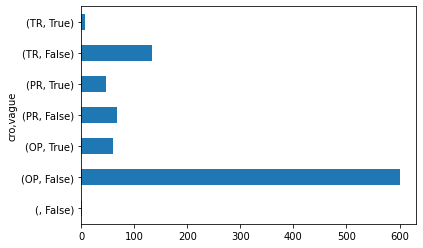

In [15]:
vague = df.groupby(['cro','vague']).size()
print(vague)
vague.plot(kind='barh')

cro  past 
     False      1
OP   False    639
     True      22
PR   False    115
TR   False    140
     True       1
dtype: int64


<AxesSubplot:ylabel='cro,past'>

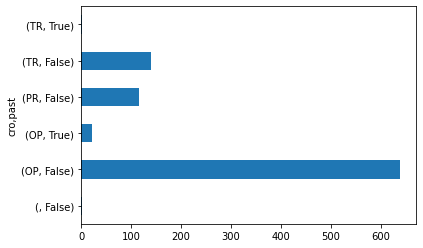

In [9]:
past = df.groupby(['cro','past']).size()
print(past)
past.plot(kind='barh')

In [11]:
len(df.span_id.unique())
# spans = df[df.duplicated(subset=['report_id','span_id'], keep=False)]
# spans

31

In [16]:
df.keyword.count()

72